<a href="https://colab.research.google.com/github/Daniel95EngMecUFRJ/YOLO_For_Detect_Veiculos_Fumaca_Paris/blob/main/YOLOv8_Veiculos_Fumaca_Paris_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Veículos e Fumaça com YOLOv8

Este notebook aplica o YOLOv8 pré-treinado para detectar veículos e visualizar emissão de fumaça em imagens urbanas, com foco em aplicações ambientais para cidades sustentáveis como Paris.

In [6]:
# 1. Instalar o pacote Ultralytics
!pip install ultralytics --upgrade -q
from ultralytics import YOLO

In [7]:
# 2. Fazer upload da imagem
from google.colab import files
uploaded = files.upload()

Saving carro-queimando-oleo.jpg to carro-queimando-oleo (1).jpg


In [8]:
# 3. Carregar modelo YOLOv8 pré-treinado
model = YOLO('yolov8n.pt')  # Modelo leve para teste rápido
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

Imagem usada: carro-queimando-oleo (1).jpg

image 1/1 /content/carro-queimando-oleo (1).jpg: 384x640 4 cars, 462.4ms
Speed: 17.3ms preprocess, 462.4ms inference, 42.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


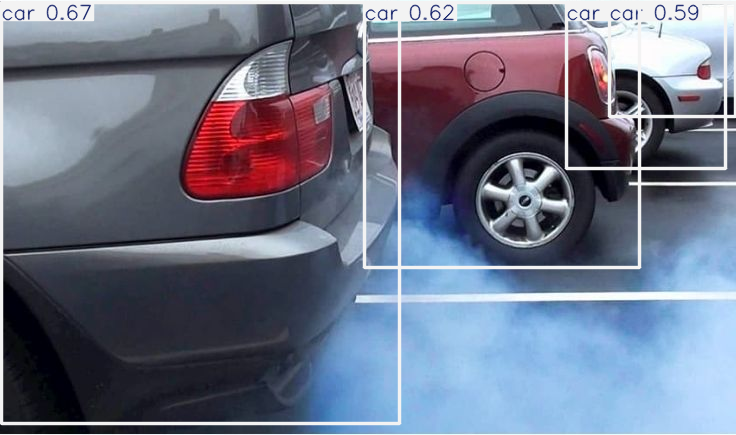

In [9]:
# 4. Rodar detecção com o nome do arquivo enviado
uploaded_file = list(uploaded.keys())[0]  # pegar o nome real
print(f"Imagem usada: {uploaded_file}")
results = model.predict(source=uploaded_file, save=True, conf=0.25)
results[0].show()

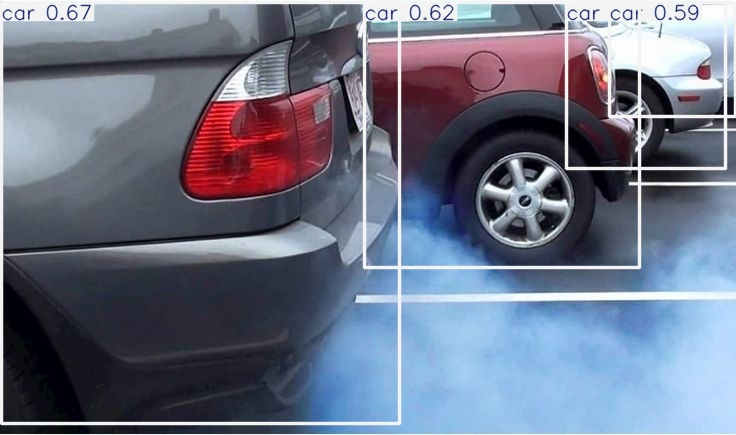

In [10]:
from PIL import Image
from IPython.display import display

# Caminho gerado automaticamente (último output)
output_path = 'runs/detect/predict2/' + uploaded_file
img = Image.open(output_path)
display(img)


In [12]:
# Contar quantos carros foram detectados
boxes = results[0].boxes
classes = boxes.cls.cpu().numpy()
labels = [model.names[int(c)] for c in classes]

# Contagem por classe
from collections import Counter
contagem = Counter(labels)
print("Contagem por classe detectada:")
print(contagem)


Contagem por classe detectada:
Counter({'car': 4})


Detecção de Veículos e Fumaça com YOLOv8 em tempo real (vídeo)

⚠️ A fumaça ainda não será detectada como uma classe separada. Podemos segmentar visualmente ou treinar um modelo com classe 'fumaça'.